In [34]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

train_path=r'E:\Program\Python\Kaggle\Titanic\dataset\train.csv'
test_path=r'E:\Program\Python\Kaggle\Titanic\dataset\test.csv'

train_data=pd.read_csv(train_path)
test_data=pd.read_csv(test_path)

## 读取数据与可视化

In [35]:
# 查看信息
train_data.info()
# test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


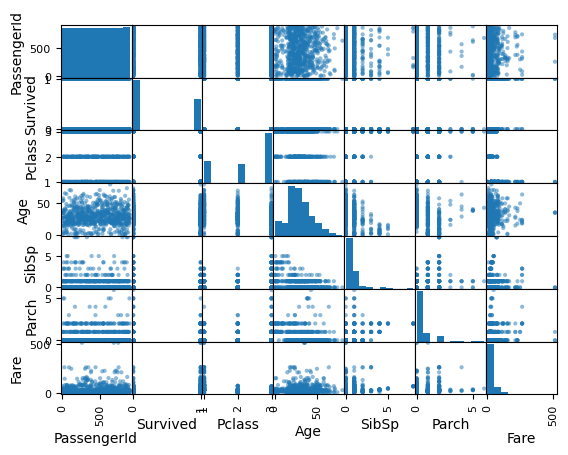

In [58]:
pd.plotting.scatter_matrix(train_data)
plt.show()

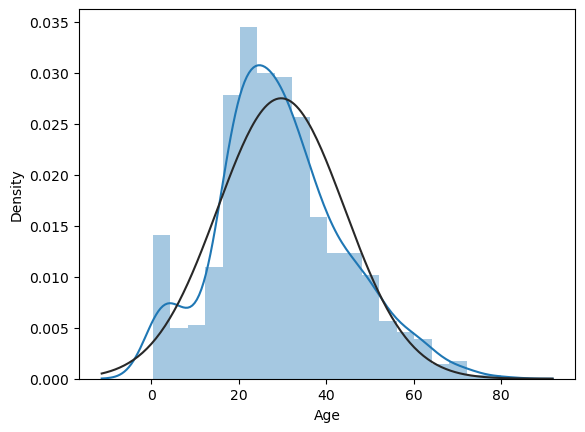

In [38]:
sns.distplot(train_data['Age'],fit=norm)
plt.show()

In [50]:
# 尖峰和偏度
print(f"偏度%.3f"%train_data['Age'].skew())
print(f"尖峰%.3f"%train_data['Age'].kurt())

偏度0.389
尖峰0.178


## 根据性别

In [11]:
# 根据性别
women=train_data_copy[train_data_copy.loc[:,'Sex']=='female']
men=train_data_copy[train_data_copy.loc[:,'Sex']=='male']
men_survived=men[men['Survived']==1]

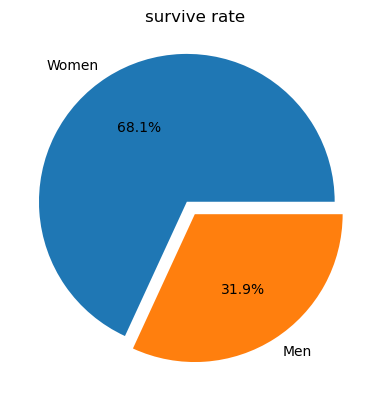

In [12]:
women_survived=women[women['Survived']==1]
women_survived_sum=women_survived.index.size
men_survived_sum=men_survived.index.size

explod=[0.1,0]
plt.title('survive rate')
plt.pie([women_survived_sum,men_survived_sum],labels= ['Women', 'Men'],explode=explod,autopct='%0.01f%%')
plt.show()

## 缺失值处理

In [3]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
# 填充缺失值
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)
train_data['Embarked'].fillna('S',inplace=True)

test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)
test_data['Embarked'].fillna('S',inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace=True)

In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# 剔除无关信息
train_data_copy = train_data[set(train_data.columns.tolist())-{'PassengerId', 'Name', 'Cabin', 'Ticket'}].copy(deep=True)
test_data_copy = test_data[set(test_data.columns.tolist())-{'PassengerId', 'Name', 'Cabin', 'Ticket'}].copy(deep=True)

C:\Users\User\AppData\Local\Temp\ipykernel_15520\2080742606.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_data_copy = train_data[set(train_data.columns.tolist())-{'PassengerId', 'Name', 'Cabin', 'Ticket'}].copy(deep=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15520\2080742606.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  test_data_copy = test_data[set(test_data.columns.tolist())-{'PassengerId', 'Name', 'Cabin', 'Ticket'}].copy(deep=True)


In [8]:
train_x=train_data_copy[set(train_data_copy.columns.tolist())-{'Survived'}].copy(deep=True)
train_y=train_data_copy['Survived'].copy(deep=True)

C:\Users\User\AppData\Local\Temp\ipykernel_15520\2196320696.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  train_x=train_data_copy[set(train_data_copy.columns.tolist())-{'Survived'}].copy(deep=True)


In [9]:
train_x

,Sex,Parch,SibSp,Embarked,Pclass,Age,Fare
0,male,0,1,S,3,22.000000,7.2500
1,female,0,1,C,1,38.000000,71.2833
2,female,0,0,S,3,26.000000,7.9250
3,female,0,1,S,1,35.000000,53.1000
4,male,0,0,S,3,35.000000,8.0500
...,...,...,...,...,...,...,...
886,male,0,0,S,2,27.000000,13.0000
887,female,0,0,S,1,19.000000,30.0000
888,female,2,1,S,3,29.699118,23.4500
889,male,0,0,C,1,26.000000,30.0000


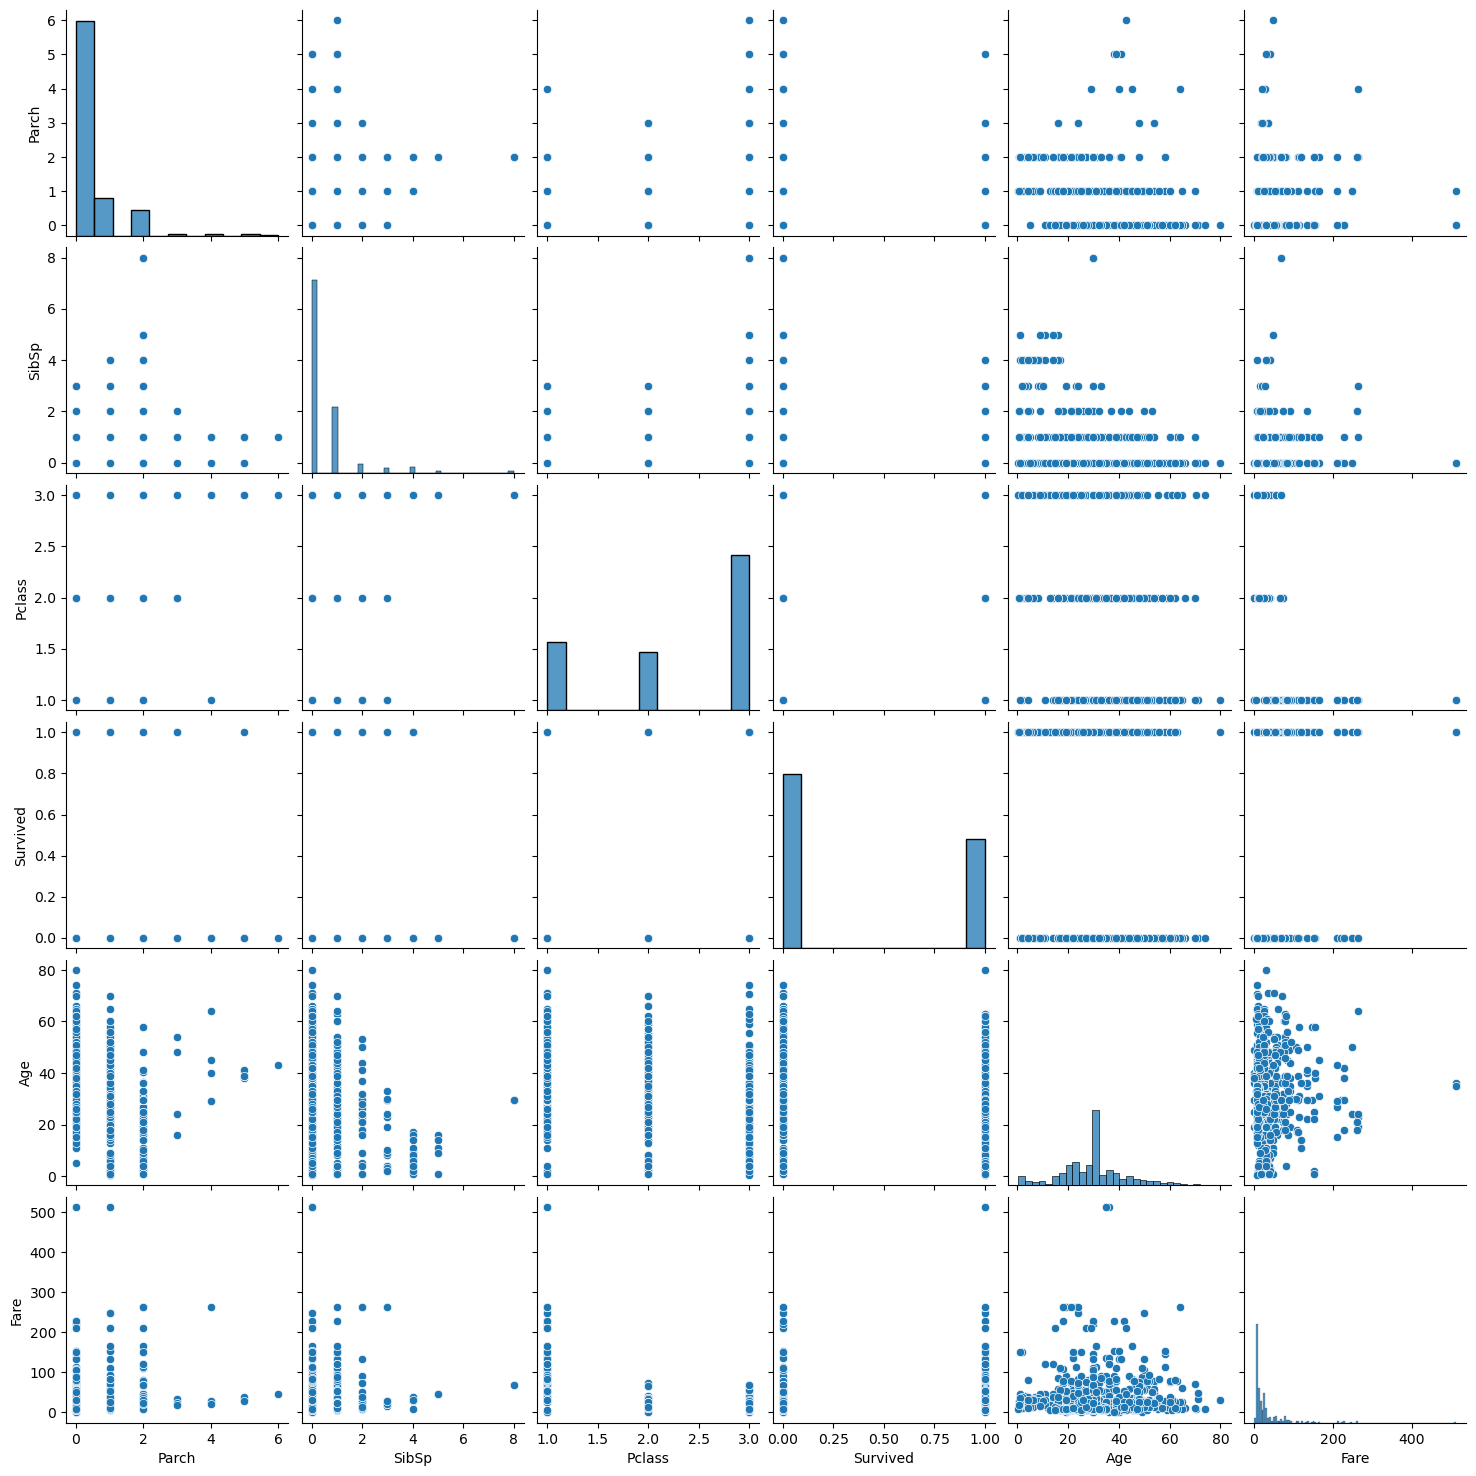

In [32]:
sns.pairplot(train_data_copy)
plt.show()

## 选取特征

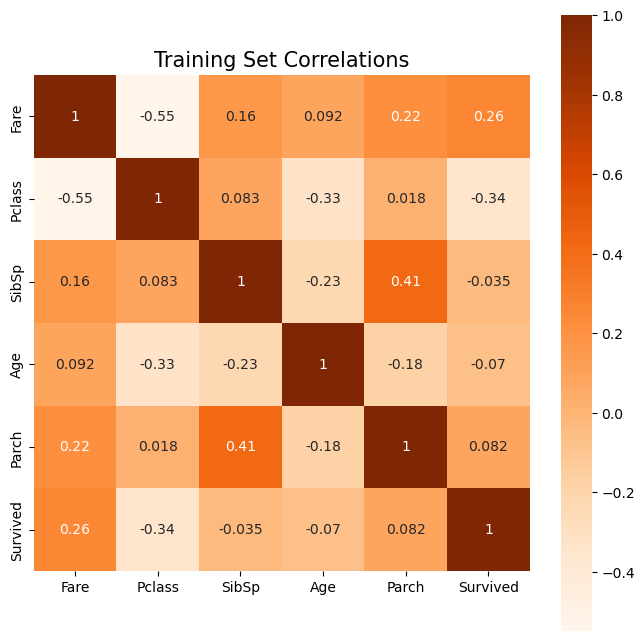

In [14]:
labels=['Fare','Pclass','SibSp','Age','Parch','Survived']
corr_data=train_data[labels].corr()
fig, axs = plt.subplots(figsize=(8, 8))
sns.heatmap(corr_data , annot=True, square=True,cmap="Oranges")
plt.title('Training Set Correlations', size=15)
plt.show()

In [15]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    object 
 1   Parch     891 non-null    int64  
 2   SibSp     891 non-null    int64  
 3   Embarked  891 non-null    object 
 4   Pclass    891 non-null    int64  
 5   Age       891 non-null    float64
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


## 生成特征

In [16]:
X=pd.get_dummies(train_x)

## normalize

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
sc = StandardScaler()
sc.fit(X)

StandardScaler()

In [18]:
X=sc.fit_transform(X)

In [19]:
y=train_data['Survived'].values.reshape(-1,1)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.7)

In [21]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=False, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

 31%|███████████████████████████████████████████▊                                                                                                 | 9/29 [00:00<00:00, 21.32it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 22/29 [00:00<00:00, 24.72it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 24.35it/s]


Text(0.5, 1.0, 'models based on Accuracy')

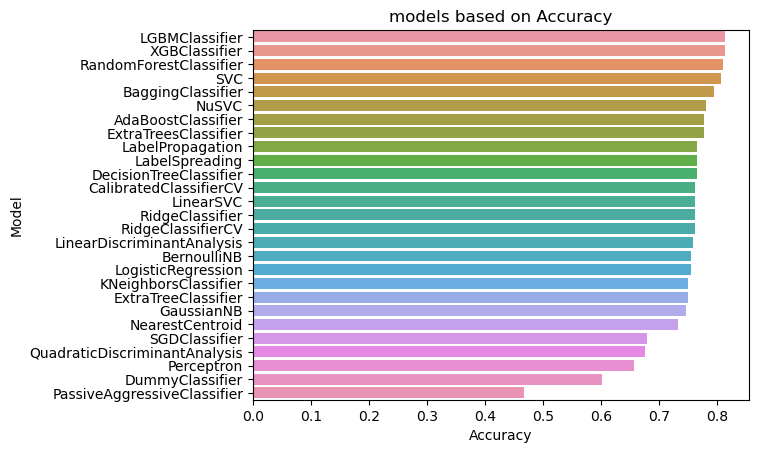

In [22]:
import seaborn as sns
temp_df = models.sort_values('Accuracy', ascending = False)
sns.barplot(x = temp_df['Accuracy'], y = temp_df.index).set_title('models based on Accuracy')

In [23]:
test_data_copy=pd.get_dummies(test_data_copy)
test_feacture=sc.fit_transform(test_data_copy)

In [24]:
import lightgbm as lgb
lgb_clf = lgb.LGBMClassifier()
lgb_clf.fit(X,y)
out_put=lgb_clf.predict(test_feacture)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': out_put})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [25]:
# 模型学习和预测
knn=KNeighborsClassifier()
knn.fit(X,y)
out_put=knn.predict(test_feacture)

In [28]:
# 输出到文件
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': out_put})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [30]:
# 准确结果
path=r'E:\Program\Python\Kaggle\Titanic\dataset\gender_submission.csv'
frame=pd.read_csv(path)
# 准确率
(frame['Survived']==output['Survived']).sum()/frame['Survived'].size

0.8492822966507177